# Puzzle, where is the Spy hiding in South America 
 Using a Markov Chain model, determine which country is the spy most likely hiding in, 
 and how likely is it that he is there? Also, what is the long-term probability that the spy 
 is in each (individual) country?

 https://pubsonline.informs.org/do/10.1287/orms.2014.02.06/full/
 

[[0.49050949 0.41458541 0.09490509]]
[[0.20366599 0.69450102 0.10183299]
 [0.89130435 0.         0.10869565]
 [0.22105263 0.77894737 0.        ]]


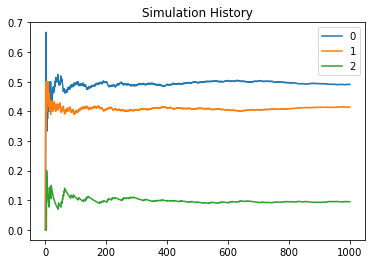

In [20]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt

# Puzzle, where is the Spy hiding in South America 
# Using a Markov Chain model, determine which country is the spy most likely hiding in, 
# and how likely is it that he is there? Also, what is the long-term probability that the spy 
# is in each (individual) country?

# https://pubsonline.informs.org/do/10.1287/orms.2014.02.06/full/

# https://towardsdatascience.com/markov-chain-analysis-and-simulation-using-python-4507cee0b06e


P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])

#stateChangeHist= np.array([[0.0,  0.0,  0.0],
#                          [0.0, 0.0,  0.0],
#                          [0.0, 0.0,  0.0]])

stateChangeHist = np.zeros((3, 3))

state=np.array([[1.0, 0.0, 0.0]])
currentState=0
stateHist=state
dfStateHist=pd.DataFrame(state)
#distr_hist = [[0,0,0]]
distr_hist = np.zeros((1, 3))

seed(1234)

# Simulate from multinomial distribution
def simulate_multinomial(vmultinomial):
    r=np.random.uniform(0.0, 1.0)
    CS=np.cumsum(vmultinomial)
    CS=np.insert(CS,0,0)
    m=(np.where(CS<r))[0]
    nextState=m[len(m)-1]
    
    return nextState

for x in range(1000):
    currentRow=np.ma.masked_values((P[currentState]), 0.0)
    nextState=simulate_multinomial(currentRow)
    # Keep track of state changes
    stateChangeHist[currentState,nextState]+=1
    # Keep track of the state vector itself
    state=np.array([[0,0,0]])
    state[0,nextState]=1.0
    # Keep track of state history
    stateHist=np.append(stateHist,state,axis=0)
    currentState=nextState
    # calculate the actual distribution over the 3 states so far
    totals=np.sum(stateHist,axis=0)
    gt=np.sum(totals)
    distrib=totals/gt
    distrib=np.reshape(distrib,(1,3))
    distr_hist=np.append(distr_hist,distrib,axis=0)
                     
                     
print(distrib)
P_hat=stateChangeHist/stateChangeHist.sum(axis=1)[:,None]
                     
# Check estimated state transition probabilities based on history so far:
print(P_hat)
                     
dfDistrHist = pd.DataFrame(distr_hist)
                     
# Plot the distribution as the simulation progresses over time
dfDistrHist.plot(title="Simulation History")
plt.show()
                     

In [25]:

# np.zeros((3, 3))

np.zeros((1, 13))

                     

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

[[0.04195804 0.07292707 0.07892108 0.08191808 0.18881119 0.06193806
  0.08491508 0.07192807 0.08691309 0.05594406 0.04595405 0.08791209
  0.03996004]]
[[0.21428571 0.28571429 0.         0.5        0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.1369863  0.17808219 0.38356164 0.1369863  0.16438356 0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.21518987 0.24050633 0.         0.3164557  0.2278481
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.08536585 0.20731707 0.         0.18292683 0.20731707 0.
  0.         0.         0.18292683 0.         0.13414634 0.
  0.        ]
 [0.         0.07446809 0.10106383 0.06914894 0.11702128 0.12765957
  0.09042553 0.12765957 0.10638298 0.09042553 0.         0.
  0.09574468]
 [0.24193548 0.         0.20967742 0.         0.20967742 0.
  0.33870968 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.    

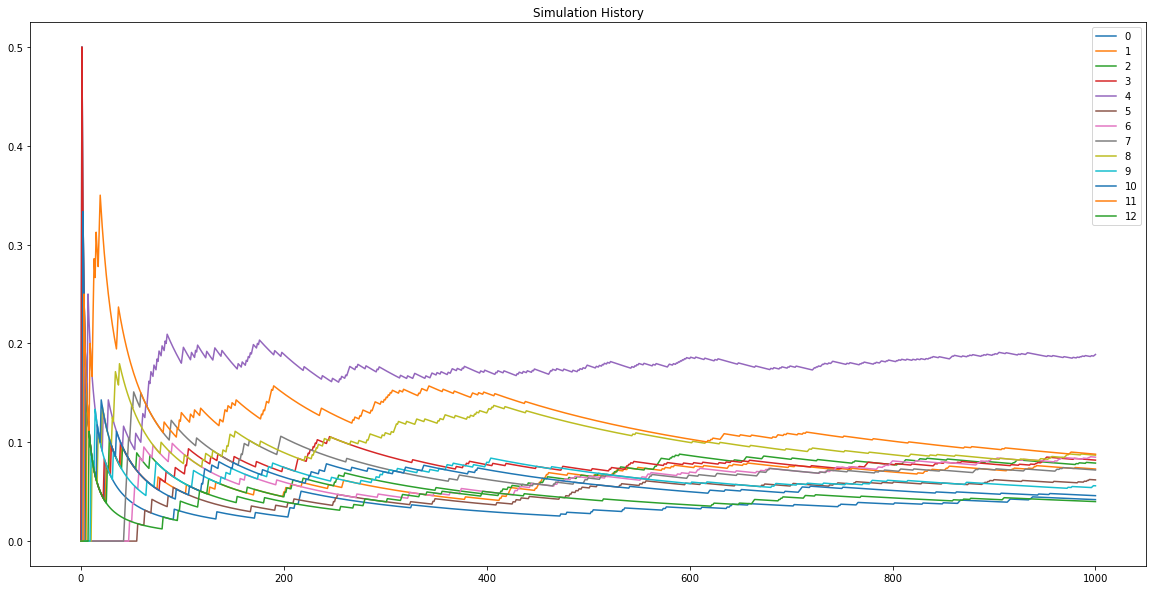

In [38]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt

#	Equador	Columbia	Venezuela	Peru	Brazil	Guyana	Surinam	French Guna	Bolivia	Paragua	Chille	Argentina	Uruguay

P = np.array([[1/3, 1/3, 0.0, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0.2, 0.2, 0.2, 0.2, 0.2, 0, 0, 0, 0, 0, 0, 0, 0],
              [0.0, 0.25, 0.25, 0, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0],
              [1/6, 1/6, 0.0, 1/6, 1/6, 0, 0, 0, 1/6, 0, 1/6, 0, 0],
              [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0.1],
              [0.25, 0.0, 0.25, 0, 0.25, 0, 0.25, 0, 0, 0, 0, 0, 0],
              [0.0, 0.0, 0.0, 0, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0],
              [0.0, 0.0, 0.0, 0, 1/3, 0, 1/3, 1/3, 0, 0, 0, 0, 0],
              [0.0, 0.0, 0.0, 1/6, 1/6, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 0],
              [0.0, 0.0, 0.0, 0, 0.25, 0, 0, 0, 0.25, 0.25, 0, 0.25, 0],
              [0.0, 0.0, 0.0, 0.25, 0, 0, 0, 0, 0.25, 0, 0.25, 0.25, 0],
              [0.0, 0.0, 0.0, 0, 1/6, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6],
              [0.0, 0.0, 0.0, 0, 1/3, 0, 0, 0, 0, 0, 0, 1/3, 1/3]])



stateChangeHist = np.zeros((13, 13))

state=np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
currentState=0
stateHist=state
dfStateHist=pd.DataFrame(state)
#distr_hist = [[0,0,0]]
distr_hist = np.zeros((1, 13))

seed(1234)

# Simulate from multinomial distribution
def simulate_multinomial(vmultinomial):
    r=np.random.uniform(0.0, 1.0)
    CS=np.cumsum(vmultinomial)
    CS=np.insert(CS,0,0)
    m=(np.where(CS<r))[0]
    nextState=m[len(m)-1]
    
    return nextState

for x in range(1000):
    currentRow=np.ma.masked_values((P[currentState]), 0.0)
    nextState=simulate_multinomial(currentRow)
    # Keep track of state changes
    stateChangeHist[currentState,nextState]+=1
    # Keep track of the state vector itself
    #state=np.array([[0,0,0]])
    state=np.zeros((1, 13))
    state[0,nextState]=1.0
    # Keep track of state history
    stateHist=np.append(stateHist,state,axis=0)
    currentState=nextState
    # calculate the actual distribution over the 3 states so far
    totals=np.sum(stateHist,axis=0)
    gt=np.sum(totals)
    distrib=totals/gt
    distrib=np.reshape(distrib,(1,13))
    distr_hist=np.append(distr_hist,distrib,axis=0)
                     
                     
print(distrib)

P_hat=stateChangeHist/stateChangeHist.sum(axis=1)[:,None]
                     
# Check estimated state transition probabilities based on history so far:
print(P_hat)
                     
dfDistrHist = pd.DataFrame(distr_hist)
                     
# Plot the distribution as the simulation progresses over time
#dfDistrHist.plot(title="Simulation History", figsize=(20, 10))
dfDistrHist.plot(title="Simulation History", figsize=(20, 10))


plt.show()
                  

In [24]:
1/6

0.16666666666666666

In [54]:

# Linalg Solver way, with Matrix Dot and Identity Matrix

# https://towardsdatascience.com/markov-chain-analysis-and-simulation-using-python-4507cee0b06e



import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt

P = np.array([[0.9262, 0.0385, 0.01, 0.0253],
              [0.01, 0.94, 0.01, 0.04],
              [0.01, 0.035, 0.92, 0.04],
              [0.035, 0.035, 0.035, 0.895]])
A=np.append(np.transpose(P)-np.identity(4),[[1,1,1,1]],axis=0)
b=np.transpose(np.array([0,0,0,0,1]))
np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))

array([0.19271417, 0.3731985 , 0.17929812, 0.25478901])

In [50]:
#   G  B 
#G 0.9 .1 
#B .2  .8 

P = np.array([[0.9, 0.1],
              [0.2, 0.8]])

#stateChangeHist= np.array([[0.0,  0.0,  0.0],
#                          [0.0, 0.0,  0.0],
#                          [0.0, 0.0,  0.0]])

stateChangeHist = np.zeros((2, 2))

state=np.array([[1.0, 0.0]])
currentState=0
stateHist=state
dfStateHist=pd.DataFrame(state)
#distr_hist = [[0,0,0]]
distr_hist = np.zeros((1, 2))

seed(1234)

# Simulate from multinomial distribution
def simulate_multinomial(vmultinomial):
    r=np.random.uniform(0.0, 1.0)
    CS=np.cumsum(vmultinomial)
    CS=np.insert(CS,0,0)
    m=(np.where(CS<r))[0]
    nextState=m[len(m)-1]
    
    return nextState

for x in range(1000):
    currentRow=np.ma.masked_values((P[currentState]), 0.0)
    nextState=simulate_multinomial(currentRow)
    # Keep track of state changes
    stateChangeHist[currentState,nextState]+=1
    # Keep track of the state vector itself
    state=np.array([[0,0]])
    state[0,nextState]=1.0
    # Keep track of state history
    stateHist=np.append(stateHist,state,axis=0)
    currentState=nextState
    # calculate the actual distribution over the 3 states so far
    totals=np.sum(stateHist,axis=0)
    gt=np.sum(totals)
    distrib=totals/gt
    distrib=np.reshape(distrib,(1,2))
    distr_hist=np.append(distr_hist,distrib,axis=0)
                     
                     
print(distrib)


[[0.66883312 0.33116688]]


In [48]:
0.67713229 * 100 + 0.32286771 * 60

87.0852916

In [58]:
# Linalg Solver way, with Matrix dot 
# https://towardsdatascience.com/markov-chain-analysis-and-simulation-using-python-4507cee0b06e
    

P = np.array([[0.9, 0.1],
              [0.2, 0.8]])
A=np.append(np.transpose(P)-np.identity(2),[[1,1]],axis=0)
b=np.transpose(np.array([0,0,1]))
np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))


array([0.66666667, 0.33333333])

In [56]:
a = np.array([[1, 1], [2, 2], [3, 3]])

In [32]:
a

array([[1, 1],
       [2, 2],
       [3, 3]])

In [30]:
b = np.insert(a, 1, 5)

In [31]:
b

array([1, 5, 1, 2, 2, 3, 3])

In [33]:
np.insert(a, 0, 0)

array([0, 1, 1, 2, 2, 3, 3])

Prof. Karen observes an average of 20 customers/hr arriving and each technician (service window) serves 5 customer/hr, on average. Assume an M/M/s queue system.

Prof. Karen calculates the operational cost of each server as $20/hr, and assumes a cost of waiting in the SYSTEM as $25/hr per customer.

What is the optimal number of service windows to minimize total cost?

In [25]:

import math


Lambda = 20.0   # hr
Mu = 5.0   # hr/server ?

#Cs = 20 * s
#Cw = 25 * Lq 

def calc_P0(lam, mu, s) :
    result = 0
    for n in range(0, s):
        result += (((lam/mu)**n) /math.factorial(n))
    
    result += (((lam/mu)**s)/math.factorial(s)) * ( (s*mu) / ( (s*mu)-lam))
    P0 = result**(-1)
    
    return P0
    

def calc_queue_attrs(lam, mu, s) :
    P0 = calc_P0(lam, mu, s)
    Lq = (P0 * ((lam/mu)**(s+1)))/(math.factorial(s-1) * ((s-(lam/mu))**2))
    print(Lq)
    L = Lq + (lam/mu)
    print(L)
    Wq = Lq/lam
    print(Wq)
    W = Wq + (1/mu)
    print(W)
    utilization = lam*100/ (s*mu)
    Pw = (1/math. factorial(s)) * ((lam/mu)**s) * ( (s*mu) / ( (s*mu)-lam)) * P0

    
    
#Total Cost
def total_cost(lam, mu, s) :
    P0 = calc_P0(lam, mu, s)
    Lq = (P0 * ((lam/mu)**(s+1)))/(math.factorial(s-1) * ((s-(lam/mu))**2))
    Cs = 20 * s
    Cw = 25 * Lq 
    cost = Cs + Cw
    
    return cost




In [33]:
total_cost(20, 5, 5)

155.4112554112554

In [34]:
total_cost(20, 5, 6)

134.23804226918799

In [35]:
total_cost(20, 5, 7)

144.50367242820073

In [36]:
total_cost(20, 5, 8)

161.47609986738166

In [37]:
total_cost(20, 5, 9)

180.47515747711796

In [26]:
calc_queue_attrs(5, 6, 1)

4.166666666666669
5.000000000000002
0.8333333333333337
1.0000000000000004


In [ ]:
Lambda = 20.0   # hr
Mu = 5.0   # hr ?

Wq = Lambda/Mu*(Mu-Lambda)

4/60 = 20/Mu*(Mu-20)

4*Mu*(Mu-20) = 1200
Mu*Mu - 20Mu = 300 




In [5]:
# Solve the quadratic equation ax**2 + bx + c = 0

# import complex math module
import cmath

a = 1
b = -20
c = -300

# calculate the discriminant
d = (b**2) - (4*a*c)

# find two solutions
sol1 = (-b-cmath.sqrt(d))/(2*a)
sol2 = (-b+cmath.sqrt(d))/(2*a)

print('The solution are {0} and {1}'.format(sol1,sol2))

The solution are (-10+0j) and (30+0j)


In [6]:
Mu = 30
20/(Mu*(Mu-20))

0.06666666666666667

In [3]:
4/60

0.06666666666666667

In [ ]:
Lambda = 16.0   # minute
Mu = 5.0   # hr ?

10/60 = 16/Mu*(Mu-16) + 1/Mu

1/6 